In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [18]:
#Reading the csv data
service_request_data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
service_request_data.shape

(300698, 53)

In [20]:
service_request_data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [21]:
service_request_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [22]:
#Converting the timestamp from object to datetime type and adding a column named Request_closing_Time
service_request_data['Created Date'] = pd.to_datetime(service_request_data['Created Date'])
service_request_data['Closed Date'] = pd.to_datetime(service_request_data['Closed Date'])

In [23]:
service_request_data['Request_Closing_Time'] = service_request_data['Closed Date']-service_request_data['Created Date']

In [24]:
mid = service_request_data['Request_Closing_Time']
service_request_data.drop(labels=['Request_Closing_Time'],axis = 1, inplace=True)
service_request_data.insert(3,'Request_Closing_Time',mid)

In [25]:
service_request_data['Request_Closing_Time'] = service_request_data['Request_Closing_Time'] / np.timedelta64(1, 'h')

In [39]:
service_request_data.head()

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,0.920833,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,1.437778,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,4.858611,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,7.753889,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,3.450556,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


Now that we have loaded the data and added the requested column, let's take a view at the data through histogram and remove any outliers or any kind of anomalies.<br>
Here, we are looking for any kind of data which might have:<br>
a. Any anomaly in the datetime stamp(i.e. year should be between 2015 and 2016)<br>
b. Any columns with all values empty<br>
c. Boundaries that do not make sense, such as a percentage value greater than 100<br>
d. Latitude should be between -90 to +90 and Longitude should be between -180 to +180<br>
e. Numeric features that should be categorical (indicator) features. For example, if there are only two possible values like 0 and 1

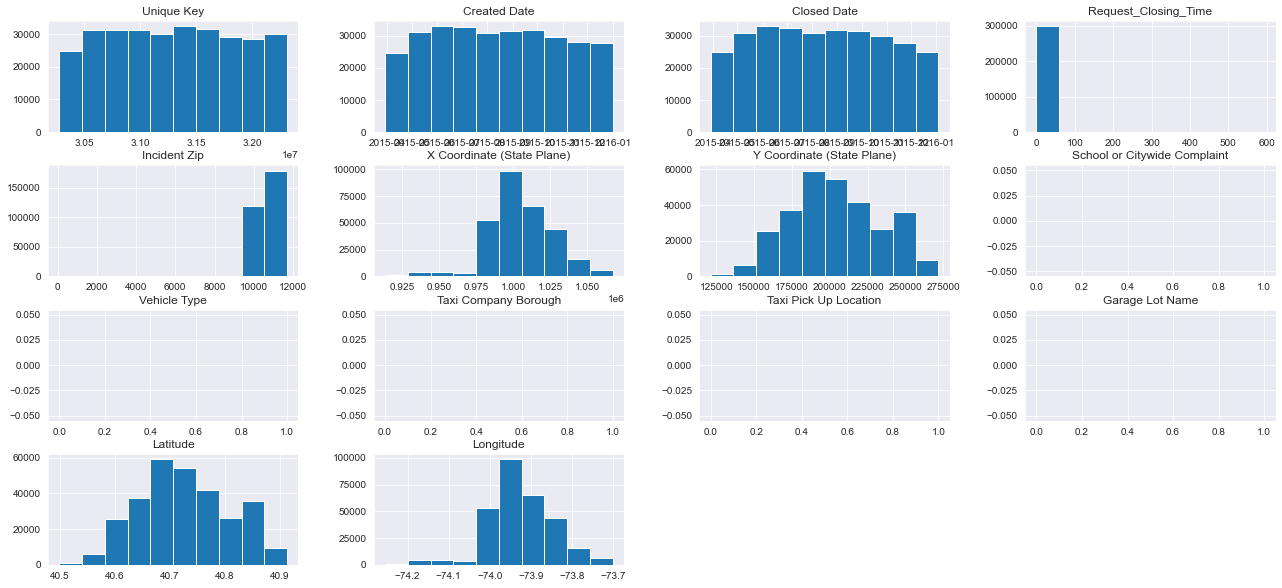

In [40]:
service_request_data.hist(figsize=(22,10))
plt.show()

As we can see, columns like School or Citywide complaint, vehicle type, taxi company borough etc. being float type columns are empty. So, we can proceed to remove them.

In [41]:
service_request_data.describe()

,Unique Key,Request_Closing_Time,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298534.000000,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,4.314398,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,6.089484,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,0.016667,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,1.275833,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,2.715417,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,5.350000,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,592.872778,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [42]:
service_request_data.describe(include='object')

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,...,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Location
count,300698,300698,300698,294784,300567,256288,256288,251419,250919,43858,...,300698,300697,300698,243,243,213,213,1,2,297158
unique,1,3,24,45,18,107652,7320,5982,5823,4413,...,2,1,1,29,34,2,160,1,2,126048
top,NYPD,New York City Police Department,Blocked Driveway,Loud Music/Party,Street/Sidewalk,1207 BEACH AVENUE,BROADWAY,BROADWAY,BEND,BROADWAY,...,Unspecified,Unspecified,N,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),Manhattan Bound,St. George Terminal (Staten Island),"(40.83036235589997, -73.86602154214397)"
freq,300698,300690,77044,61430,249299,904,3237,4338,4391,672,...,300697,300697,300698,33,21,162,6,1,1,902


In [43]:
#To find out count of null values in every column
service_request_data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Request_Closing_Time                2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board 

In [44]:
serv_nonull = service_request_data.dropna(how='all', axis=1)

In [45]:
serv_clean = serv_nonull.dropna(how='all')

<h4>IMPORTANT</h4>There are some rows where Closed Date is before Created Date. As the complaint cannot be closed before it is opened so, following to remove those rows.

In [67]:
serv_clean = serv_clean[serv_clean['Closed Date'] >= serv_clean['Created Date']]

In [68]:
serv_clean.shape

(298534, 49)

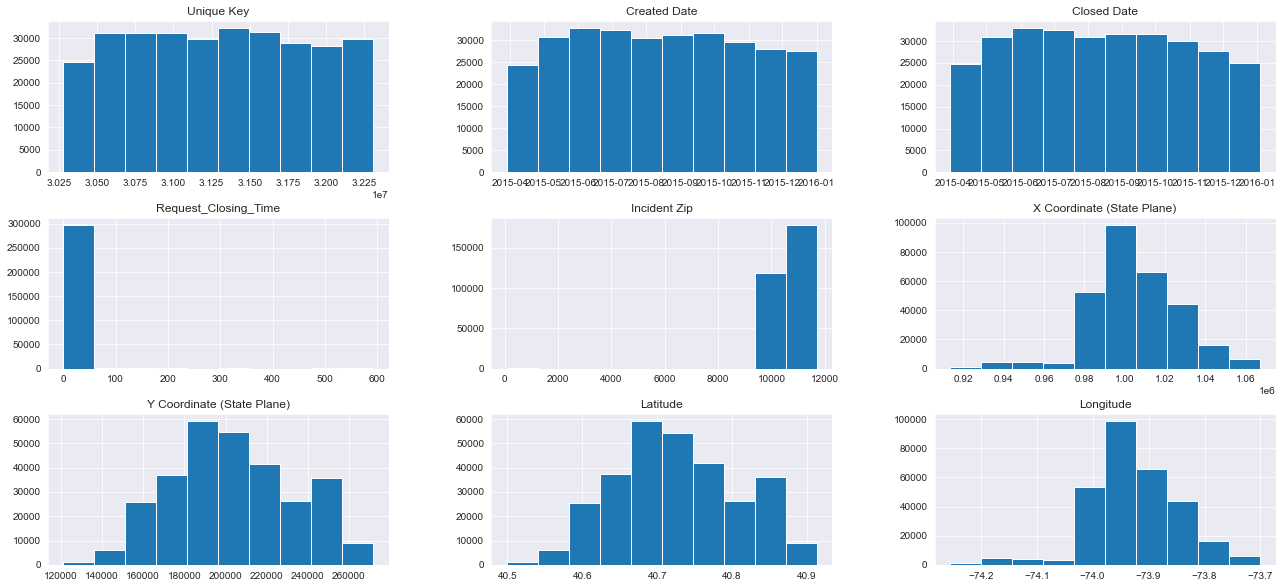

In [96]:
serv_clean.hist(figsize=(22,10))
plt.show()

As we can see now, all histograms look good.

In [97]:
serv_clean.describe()

,Unique Key,Request_Closing_Time,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,2.985340e+05,298534.000000,298027.000000,2.971020e+05,297102.000000,297102.000000,297102.000000
mean,3.130087e+07,4.314398,10848.929886,1.004855e+06,203753.772782,40.725883,-73.925625
std,5.740837e+05,6.089484,583.173185,2.175284e+04,29880.600637,0.082014,0.078452
min,3.027948e+07,0.016667,83.000000,9.133570e+05,121219.000000,40.499135,-74.254937
25%,3.080121e+07,1.275833,10310.000000,9.919760e+05,183337.500000,40.669789,-73.972142
50%,3.130562e+07,2.715417,11208.000000,1.003160e+06,201110.000000,40.718655,-73.931780
75%,3.178561e+07,5.350000,11238.000000,1.018372e+06,224123.000000,40.781816,-73.876805
max,3.231065e+07,592.872778,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760


In [98]:
serv_clean.describe(include='object')

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,...,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Location
count,298534,298534,298534,292625,298406,254137,254137,250971,250881,43440,...,298534,298533,298534,243,243,213,213,0,0,297102
unique,1,3,23,43,16,106525,6840,5864,5823,4211,...,2,1,1,29,34,2,160,0,0,126041
top,NYPD,New York City Police Department,Blocked Driveway,Loud Music/Party,Street/Sidewalk,1207 BEACH AVENUE,BROADWAY,BROADWAY,BEND,BROADWAY,...,Unspecified,Unspecified,N,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),NaN,NaN,"(40.83036235589997, -73.86602154214397)"
freq,298534,298527,76810,60829,247503,901,3203,4333,4391,672,...,298533,298533,298534,33,21,162,6,NaN,NaN,901


In [99]:
serv_clean.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                            0
Request_Closing_Time                   0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5909
Location Type                        128
Incident Zip                         507
Incident Address                   44397
Street Name                        44397
Cross Street 1                     47563
Cross Street 2                     47653
Intersection Street 1             255094
Intersection Street 2             255180
Address Type                         707
City                                 506
Landmark                          298185
Facility Type                         15
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Action Updated Date        39
Community Board 

<h3>Major Complaint Types

In [100]:
serv_clean['Complaint Type'].value_counts()

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

Text(0.5, 1.0, 'Major Complaint Types')

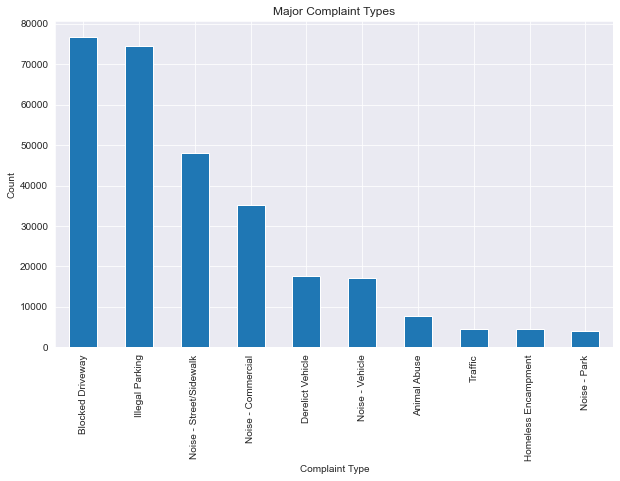

In [101]:
fig = plt.figure(figsize = (10, 6))
counts = pd.value_counts(serv_clean['Complaint Type'].values, sort=True).head(10)
counts.plot.bar()
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.title('Major Complaint Types')

We can see, the maximum complaints are about Blocked Driveway and Illegal Parking, nearing almost 50% of all complaints<br>

<h3>Distribution of complaints across different Boroughs

In [102]:
serv_clean['Borough'].value_counts()

BROOKLYN         98295
QUEENS           80629
MANHATTAN        66109
BRONX            40697
STATEN ISLAND    12338
Unspecified        466
Name: Borough, dtype: int64

Text(0.5, 1.0, 'Percentage of complaints in different boroughs')

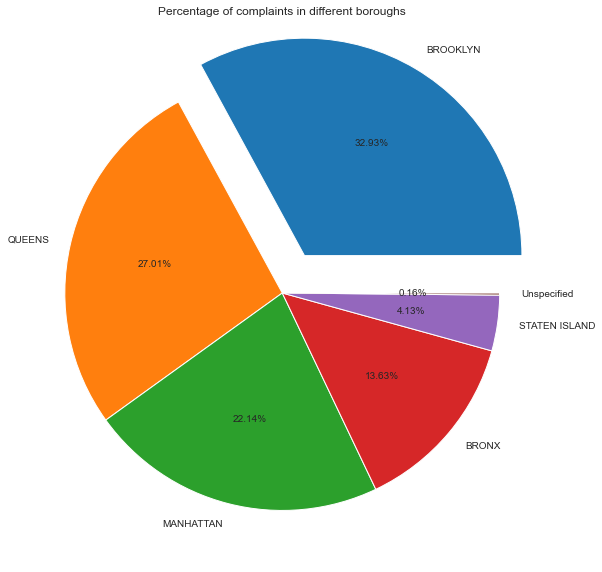

In [103]:
fig = plt.figure(figsize = (10, 10))
counts = pd.value_counts(serv_clean['Borough'].values, sort=True)
counts.plot(kind = 'pie',explode = (0.2,0,0,0,0,0),autopct='%1.2f%%')
plt.ylabel("")
plt.title('Percentage of complaints in different boroughs')

We can see, a majority of complaints are from Brooklyn borough(nearly 33%)<br>

<h3>Average Response Time of different complaints

In [95]:
maxreq = serv_clean.copy()
art = maxreq.groupby('Complaint Type').mean('Request_Closing_Time')
art['Request_Closing_Time']

Complaint Type
Agency Issues                  5.260324
Animal Abuse                   5.213244
Animal in a Park             336.834722
Bike/Roller/Skate Chronic      3.766462
Blocked Driveway               4.740905
Derelict Vehicle               7.364140
Disorderly Youth               3.558584
Drinking                       3.861833
Graffiti                       7.151251
Homeless Encampment            4.365570
Illegal Fireworks              2.761139
Illegal Parking                4.501152
Noise - Commercial             3.147154
Noise - House of Worship       3.193298
Noise - Park                   3.410732
Noise - Street/Sidewalk        3.445224
Noise - Vehicle                3.588993
Panhandling                    4.372768
Posting Advertisement          1.975803
Squeegee                       4.045625
Traffic                        3.448681
Urinating in Public            3.626664
Vending                        4.013919
Name: Request_Closing_Time, dtype: float64

In [157]:
art.head()

,Unique Key,Request_Closing_Time,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
Complaint Type,,,,,,,
Agency Issues,3.081417e+07,5.260324,NaN,NaN,NaN,NaN,NaN
Animal Abuse,3.128602e+07,5.213244,10822.599073,1.004912e+06,202806.793856,40.723277,-73.925413
Bike/Roller/Skate Chronic,3.124835e+07,3.766462,10541.258294,9.966257e+05,205992.413043,40.732057,-73.955335
Blocked Driveway,3.135998e+07,4.740905,11094.050917,1.011287e+06,200243.690787,40.716234,-73.902430
Derelict Vehicle,3.130230e+07,7.364140,11082.879090,1.012358e+06,193230.899966,40.696956,-73.898569


Text(0.5, 1.0, 'Average response Time')

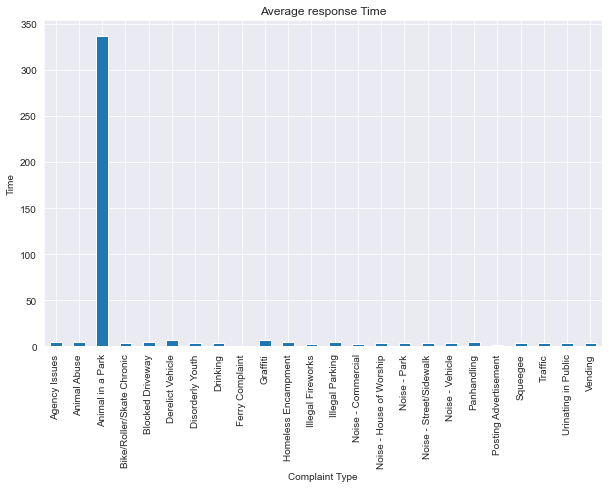

In [62]:
fig = plt.figure(figsize = (10, 6))
art['Request_Closing_Time'].plot.bar()
plt.ylabel('Time')
plt.title('Average response Time')

We can see there is one single complaint(Animal in a Park) which took lot of time(~14 days to resolve), whereas most other complaints were resolved in a day's time. <br>Now let's see the Average Response Time of complaints excluding this complaint.

In [127]:
art = art.drop('Animal in a Park')

Text(0.5, 1.0, 'Average response Time')

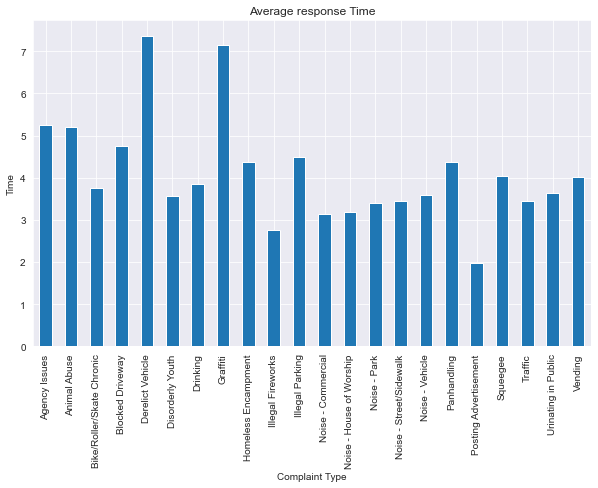

In [128]:
fig = plt.figure(figsize = (10, 6))
art['Request_Closing_Time'].plot.bar()
plt.ylabel('Time')
plt.title('Average response Time')

We can see that all other complaints are resolved within a span of 2-8 hrs. Complaints like Derelict Vehicle and Graffiti take more than 7 hours to resolve while complaints like Posting Advertisement are resolved within 2 hours.<br>

Now let's have a broader view of all complaints

In [356]:
serv_clean['Status'].value_counts()

Closed      298471
Open            36
Assigned        26
Draft            1
Name: Status, dtype: int64

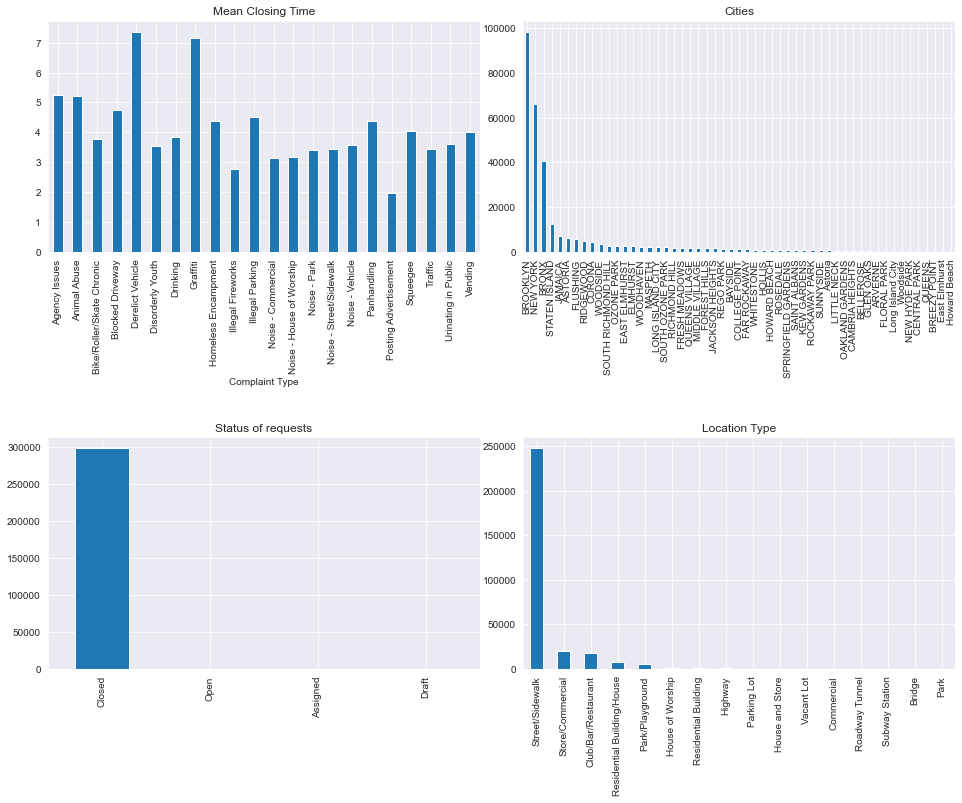

In [129]:
plt.subplot(221)
art['Request_Closing_Time'].plot(kind='bar', title='Mean Closing Time', figsize=(21,15))
plt.subplot(222)
serv_clean['City'].value_counts().plot(kind='bar', title='Cities')
plt.subplot(223)
serv_clean['Status'].value_counts().plot(kind='bar', title='Status of requests')
plt.subplot(224)
serv_clean['Location Type'].value_counts().plot(kind='bar', title='Location Type')
plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.7, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.8)
plt.show()

We can infer the following from the above graphs:<br>
a. Complaints like Graffiti and Derelict vehicle took more than 7 hours to resolve while complaints like Posting Advertisement are resolved within a couple of hours<br>
b. Cities like Brooklyn, New York and Bronx have raised the most number of complaints accounting for more than 80% of the complaints<br>
c. Most of the requests are closed(more than 90%) and only a small amount of complaints are open<br>
d. Complaints from Street/Sidewalk location type are much more than any other location types<br>

Now, let's see the complaint types by cities and see which complaints are prevalent in major cities

<h1> Complaint Type by City

In [344]:
comp_city = serv_clean.copy()

In [345]:
comp_city['City'].value_counts()

BROOKLYN               98295
NEW YORK               65972
BRONX                  40697
STATEN ISLAND          12338
JAMAICA                 7294
ASTORIA                 6330
FLUSHING                5970
RIDGEWOOD               5162
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2733
ELMHURST                2673
WOODHAVEN               2463
MASPETH                 2461
LONG ISLAND CITY        2436
SOUTH OZONE PARK        2173
RICHMOND HILL           1902
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
FOREST HILLS            1688
JACKSON HEIGHTS         1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [346]:
comp_city.shape

(298534, 49)

In [347]:
top10_cities = ['BROOKLYN','NEW YORK','BRONX','STATEN ISLAND','JAMAICA','ASTORIA','FLUSHING','RIDGEWOOD','CORONA','WOODSIDE']
comp_cit_cat = comp_city.groupby(['Complaint Type','City']).size().unstack()
comp_cit_cat = comp_cit_cat[top10_cities]
comp_cit_cat

City,BROOKLYN,NEW YORK,BRONX,STATEN ISLAND,JAMAICA,ASTORIA,FLUSHING,RIDGEWOOD,CORONA,WOODSIDE
Complaint Type,,,,,,,,,,
Animal Abuse,2394.0,1525.0,1415.0,557.0,229.0,125.0,143.0,117.0,61.0,69.0
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,111.0,225.0,20.0,7.0,2.0,15.0,3.0,3.0,NaN,4.0
Blocked Driveway,28147.0,2070.0,12754.0,2142.0,2817.0,2618.0,2794.0,1693.0,2761.0,1613.0
Derelict Vehicle,5179.0,537.0,1952.0,1766.0,953.0,351.0,440.0,330.0,57.0,247.0
Disorderly Youth,72.0,69.0,63.0,23.0,8.0,3.0,2.0,3.0,6.0,1.0
Drinking,257.0,295.0,188.0,175.0,34.0,35.0,40.0,10.0,33.0,15.0
Graffiti,43.0,22.0,9.0,2.0,3.0,4.0,4.0,2.0,2.0,3.0
Homeless Encampment,857.0,2775.0,247.0,71.0,79.0,32.0,26.0,23.0,19.0,33.0


In [351]:
#Removing rows and columns having all NaN values
comp_cit_cat = comp_cit_cat.dropna(how='all', axis=1)
comp_cit_cat = comp_cit_cat.dropna(how='all')
comp_cit_cat.shape

(21, 10)

In [352]:
comp_cit_cat

City,BROOKLYN,NEW YORK,BRONX,STATEN ISLAND,JAMAICA,ASTORIA,FLUSHING,RIDGEWOOD,CORONA,WOODSIDE
Complaint Type,,,,,,,,,,
Animal Abuse,2394.0,1525.0,1415.0,557.0,229.0,125.0,143.0,117.0,61.0,69.0
Bike/Roller/Skate Chronic,111.0,225.0,20.0,7.0,2.0,15.0,3.0,3.0,NaN,4.0
Blocked Driveway,28147.0,2070.0,12754.0,2142.0,2817.0,2618.0,2794.0,1693.0,2761.0,1613.0
Derelict Vehicle,5179.0,537.0,1952.0,1766.0,953.0,351.0,440.0,330.0,57.0,247.0
Disorderly Youth,72.0,69.0,63.0,23.0,8.0,3.0,2.0,3.0,6.0,1.0
Drinking,257.0,295.0,188.0,175.0,34.0,35.0,40.0,10.0,33.0,15.0
Graffiti,43.0,22.0,9.0,2.0,3.0,4.0,4.0,2.0,2.0,3.0
Homeless Encampment,857.0,2775.0,247.0,71.0,79.0,32.0,26.0,23.0,19.0,33.0
Illegal Fireworks,61.0,36.0,24.0,10.0,4.0,4.0,2.0,2.0,NaN,1.0


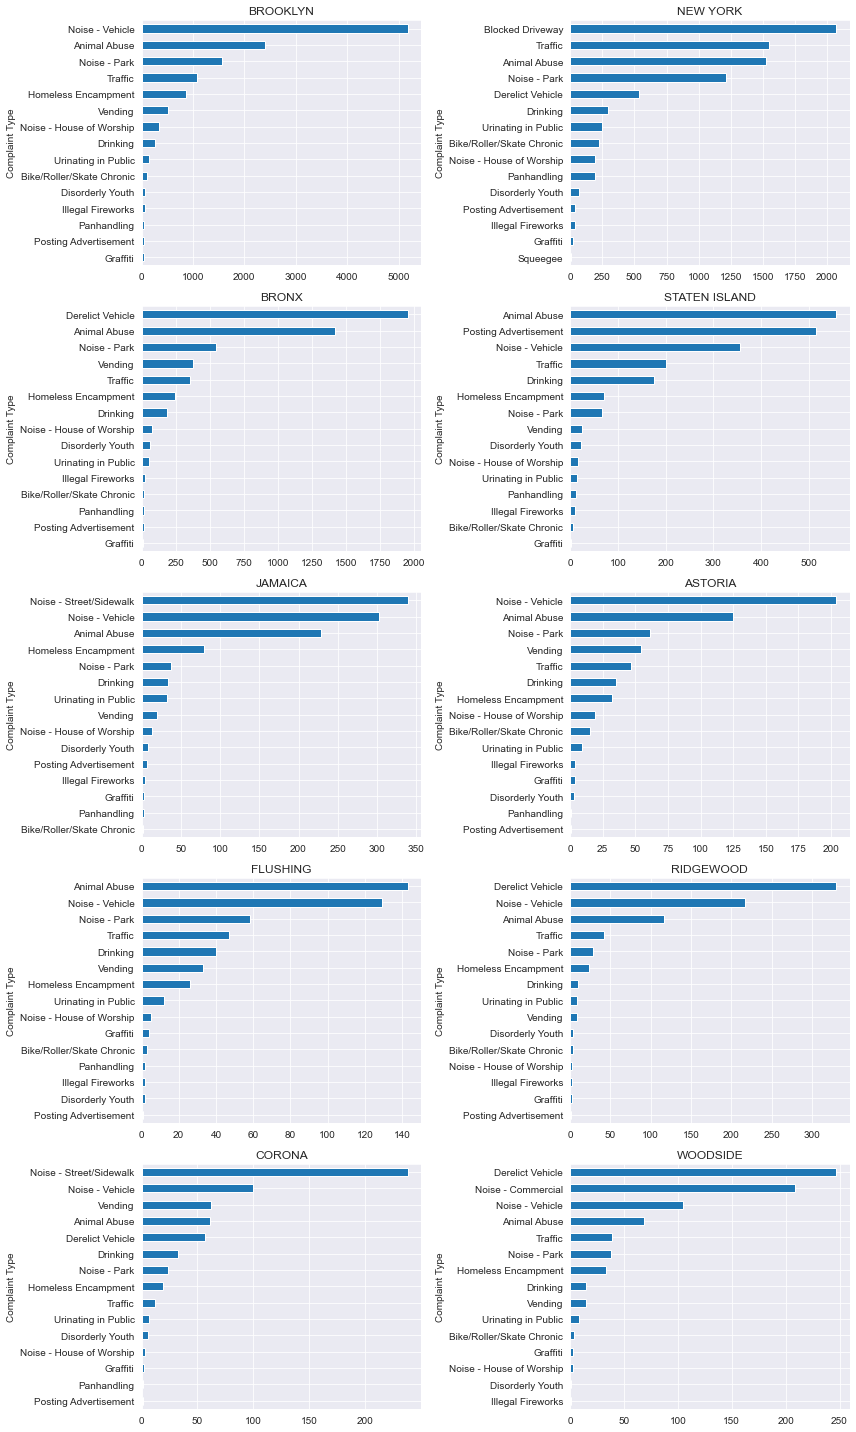

In [355]:
fig, axes = plt.subplots(5,2, figsize=(12,20))
for i, (label,col) in enumerate(comp_cit_cat.iteritems()):
    a = axes[int(i/2), i%2]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=a)
    a.set_title(label)
plt.tight_layout()

We can refer the following from the above graphs:<br>
a. Brooklyn raises the most number of complaints accounting for almost one-third of all complaints in the year 2015. More than half the complaints raised in Brooklyn are due to vehicle noise<br>
b. The most busiest city in the US - New York has most complaints due to traffic, blocked driveway, animal abuse, park noise<br>
c. 8 of the 10 cities have Animal Abuse as one of the three most raised complaints(Not to mention all cities are sorted by number of complaints and only top ten are taken into consideration)<br>
d. All of the top cities have Noise as one of the most raised complaint, may it be Vehicle, Commercial, Park or Street/Sidewalk with Brooklyn making a record here of more than 5000 complaints due to vehicle noise(nearly half of all complaints in Brooklyn)

<h1>Average Response Time by Complaint Type

In [178]:
from scipy import stats

In [229]:
comp_loc = serv_clean.copy()
comp_loc = comp_loc[['Request_Closing_Time','Complaint Type']]

In [239]:
comp_loc.head()

,Request_Closing_Time,Complaint Type
0,0.920833,Noise - Street/Sidewalk
1,1.437778,Blocked Driveway
2,4.858611,Blocked Driveway
3,7.753889,Illegal Parking
4,3.450556,Illegal Parking


In [240]:
corr1 = pd.get_dummies(comp_loc['Complaint Type'],prefix='Complaint Type')

In [241]:
corr = pd.concat([comp_loc, corr1], axis=1)
corr1 = corr.drop(labels=['Complaint Type'],axis = 1)

In [242]:
corr1.head()

,Request_Closing_Time,Complaint Type_Agency Issues,Complaint Type_Animal Abuse,Complaint Type_Animal in a Park,Complaint Type_Bike/Roller/Skate Chronic,Complaint Type_Blocked Driveway,Complaint Type_Derelict Vehicle,Complaint Type_Disorderly Youth,Complaint Type_Drinking,Complaint Type_Graffiti,...,Complaint Type_Noise - House of Worship,Complaint Type_Noise - Park,Complaint Type_Noise - Street/Sidewalk,Complaint Type_Noise - Vehicle,Complaint Type_Panhandling,Complaint Type_Posting Advertisement,Complaint Type_Squeegee,Complaint Type_Traffic,Complaint Type_Urinating in Public,Complaint Type_Vending
0,0.920833,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.437778,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.858611,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.753889,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.450556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

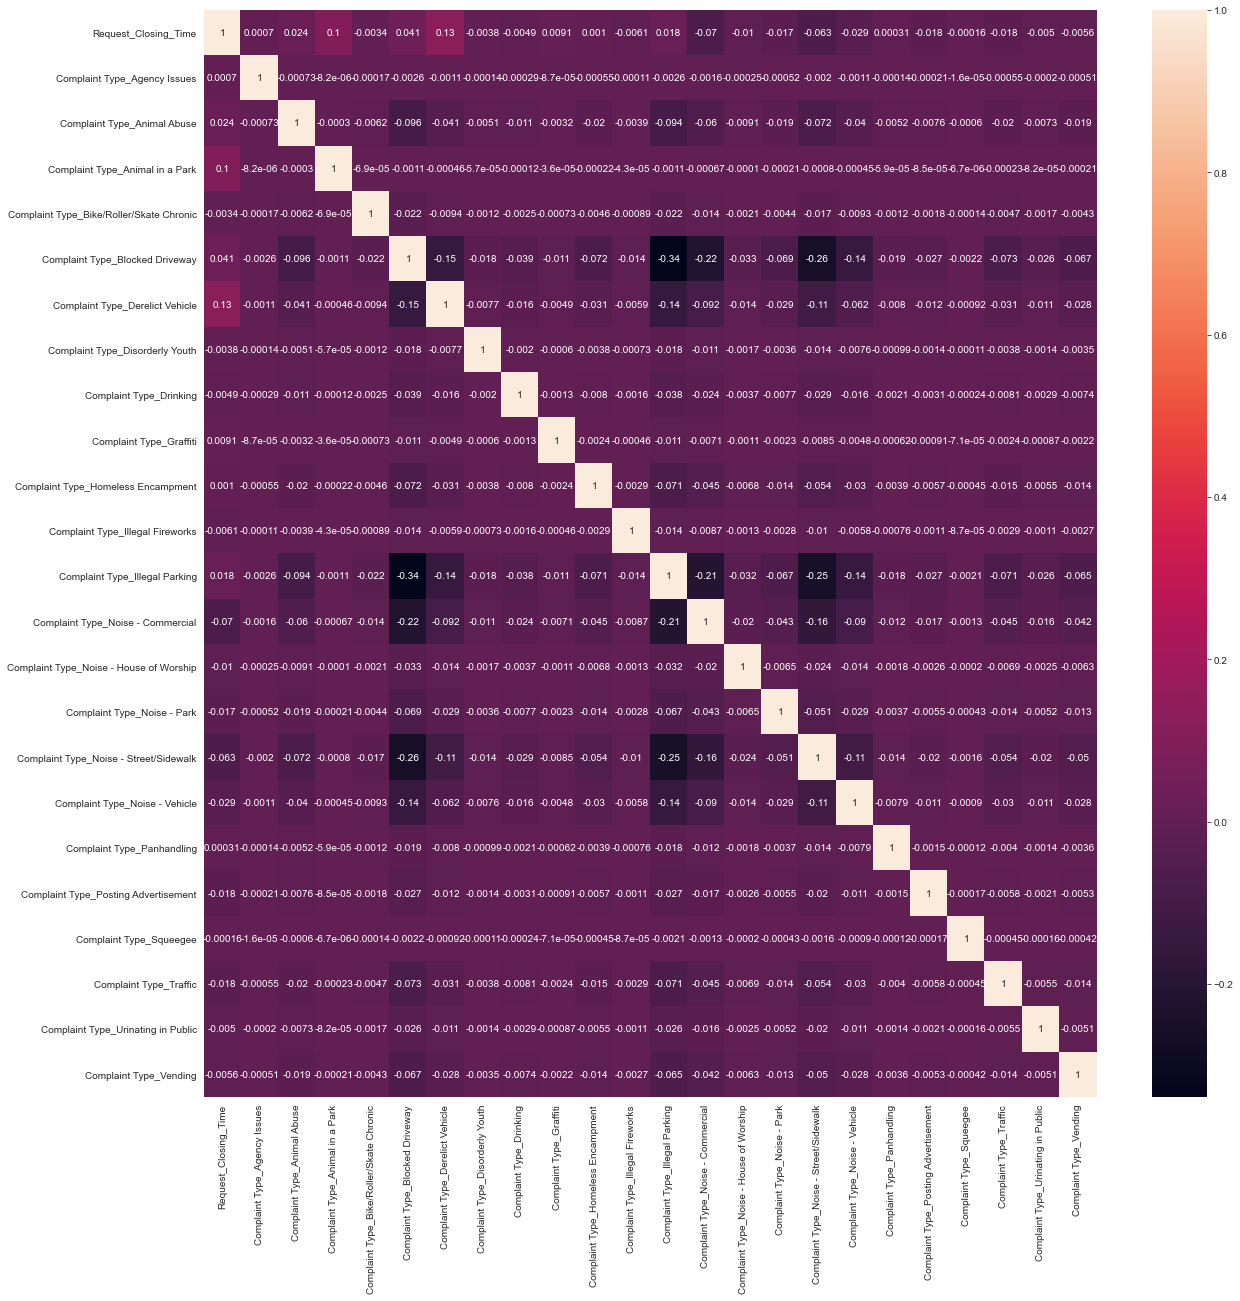

In [226]:
corr2 = corr1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr2,annot=True)

Judging from the above heatmap, most of the correlation coefficients are very close to zero. As we know, correlation of 0.0 shows no linear relationship between the movement of the two variables.<br>
We can also see, for two types of complaints(Animal in a Park and Derelict vehicle), the coefficient is nearly 0.1. Remaining all coefficients are ~0.0.<br>

Now, let's take the top ten complaint types and find out correlation through heatmap

Index(['Request_Closing_Time', 'Complaint Type_Derelict Vehicle',
       'Complaint Type_Animal in a Park', 'Complaint Type_Blocked Driveway',
       'Complaint Type_Animal Abuse', 'Complaint Type_Illegal Parking',
       'Complaint Type_Graffiti', 'Complaint Type_Homeless Encampment',
       'Complaint Type_Agency Issues', 'Complaint Type_Panhandling'],
      dtype='object')


<AxesSubplot:>

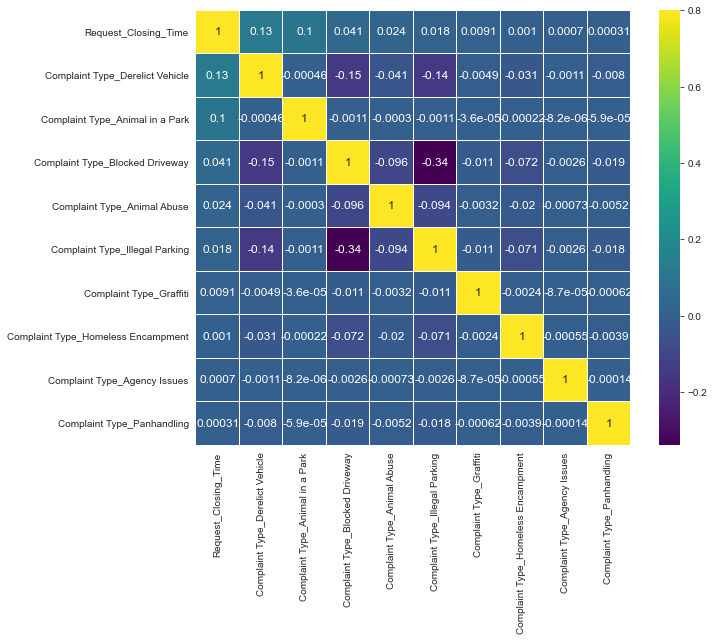

In [331]:
k = 10
cols = corr2.nlargest(k,'Request_Closing_Time')['Request_Closing_Time'].index
print(cols)
cm = np.corrcoef(corr1[cols].values.T)
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm,vmax = 0.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
           linecolor='white',xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

Here also, we can see that correlation between reponse times and complaint types are low(~0.0).<br>
Now let's do hypothesis testing and check the same.<br>

H0 = Average Response Time across complaints is similar<br>
H1 = Average Response Time across complaints is not similar

Here, we will be using ANOVA(Analysis of Variance) technique to find out p-value as we have one numeric and one categorical columns

In [271]:
from scipy.stats import f_oneway
CategoryGroupLists=comp_loc.groupby('Complaint Type')['Request_Closing_Time'].apply(list)
Result = f_oneway(*CategoryGroupLists)
print('p-value is: ', Result[1])

p-value is:  0.0


In [272]:
if Result[1]<0.05:
    print("Reject H0 and accept the fact that Average Response Time across complaints is not similar")
else:
    print("Fail to Reject H0 and Average Response Time across complaints is similar")

Reject H0 and accept the fact that Average Response Time across complaints is not similar


<h1>Complaint Type by Location

In [287]:
locc = serv_clean.copy()

In [318]:
locc1 = locc[['Complaint Type','City','Borough','Latitude','Longitude']]
locc1.head()

,Complaint Type,City,Borough,Latitude,Longitude
0,Noise - Street/Sidewalk,NEW YORK,MANHATTAN,40.865682,-73.923501
1,Blocked Driveway,ASTORIA,QUEENS,40.775945,-73.915094
2,Blocked Driveway,BRONX,BRONX,40.870325,-73.888525
3,Illegal Parking,BRONX,BRONX,40.835994,-73.828379
4,Illegal Parking,ELMHURST,QUEENS,40.733060,-73.874170


In [319]:
locc1['City'] = locc1['City'].str.upper()
locc1['Borough'] = locc1['Borough'].str.upper()

In [320]:
locc1["Complaint Type"] = locc1["Complaint Type"].astype('category')
locc1["City"] = locc1["City"].astype('category')
locc1["Borough"] = locc1["Borough"].astype('category')

In [321]:
locc1['Complaint Type'] = locc1['Complaint Type'].cat.codes
locc1['City'] = locc1['City'].cat.codes
locc1['Borough'] = locc1['Borough'].cat.codes

In [322]:
locc1.head()

,Complaint Type,City,Borough,Latitude,Longitude
0,15,29,2,40.865682,-73.923501
1,4,1,3,40.775945,-73.915094
2,4,5,0,40.870325,-73.888525
3,11,5,0,40.835994,-73.828379
4,11,12,3,40.733060,-73.874170


In [323]:
locc1.describe()

,Complaint Type,City,Borough,Latitude,Longitude
count,298534.000000,298534.000000,298534.000000,297102.000000,297102.000000
mean,9.931288,17.245125,1.755519,40.725883,-73.925625
std,4.877737,13.514482,1.124380,0.082014,0.078452
min,0.000000,-1.000000,0.000000,40.499135,-74.254937
25%,4.000000,6.000000,1.000000,40.669789,-73.972142
50%,11.000000,9.000000,2.000000,40.718655,-73.931780
75%,15.000000,29.000000,3.000000,40.781816,-73.876805
max,22.000000,47.000000,5.000000,40.912869,-73.700760


In [324]:
corr_coef = locc1.corr()
corr_coef

,Complaint Type,City,Borough,Latitude,Longitude
Complaint Type,1.000000,0.087141,-0.065506,0.152829,-0.181022
City,0.087141,1.000000,0.712509,-0.011732,-0.124472
Borough,-0.065506,0.712509,1.000000,-0.249488,0.021363
Latitude,0.152829,-0.011732,-0.249488,1.000000,0.364962
Longitude,-0.181022,-0.124472,0.021363,0.364962,1.000000


<AxesSubplot:>

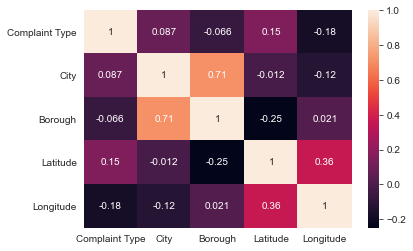

In [325]:
sns.heatmap(corr_coef,annot=True)

Judging from the heatmap above, we can see that correlation between complaint type and location(both borough and city) is very little(~0.0). This means that there is no linear relationship between location and complaint type.<br>
Now, let's check the same through Hypothesis testing

H0 = Complaint Type and Location are related<br>
H1 = Complaint Type and Location are not related

In [305]:
coeff,pval = stats.pearsonr(locc1['Complaint Type'],locc1['City'])
print(coeff,pval)

0.08714133019910597 0.0


In [306]:
coeff1,pval1 = stats.pearsonr(locc1['Complaint Type'],locc1['Borough'])
print(coeff1,pval1)

-0.06550612169808678 3.803048369369415e-281


In [307]:
if pval<0.05 and pval1<0.05:
    print("Reject H0 and accept the fact that Complaint Type and Location are not related")
else:
    print("Fail to Reject H0 and Complaint Type and Location are related")

Reject H0 and accept the fact that Complaint Type and Location are not related
